# Group by

In [1]:
import pandas as pd
import numpy as np

## 1. Splitting an object into groups 

In [2]:
df = pd.DataFrame(
     [
     ("bird", "Falconiformes", 389.0),
     ("bird", "Psittaciformes", 24.0),
     ("mammal", "Carnivora", 80.2),
     ("mammal", "Primates", np.nan),
     ("mammal", "Carnivora", 58),
     ],
     index=["falcon", "parrot", "lion", "monkey", "leopard"],
     columns=("class", "order", "max_speed"),
     )


In [3]:
df

,class,order,max_speed
falcon,bird,Falconiformes,389.0
parrot,bird,Psittaciformes,24.0
lion,mammal,Carnivora,80.2
monkey,mammal,Primates,NaN
leopard,mammal,Carnivora,58.0


In [4]:
# default is axis=0 
grouped = df.groupby("class")

In [5]:
grouped = df.groupby("order", axis="columns")

In [6]:
grouped = df.groupby(["class", "order"])

<b>NOTE: </b><i>A string passed to groupby may refer to either a column or an index level. If a string matches both a column
name and an index level name, a ValueError will be raised</i>

In [7]:
df = pd.DataFrame(
     {
     "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
     "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
     "C": np.random.randn(8),
     "D": np.random.randn(8),
     }
     )
df

,A,B,C,D
0,foo,one,-0.181462,0.011876
1,bar,one,-0.454321,0.622916
2,foo,two,-2.213435,0.292806
3,bar,three,0.060266,-1.022972
4,foo,two,-0.280545,0.545826
5,bar,two,-0.212542,0.204189
6,foo,one,-0.411605,-0.193236
7,foo,three,0.032458,1.116401


In [8]:
grouped = df.groupby("A")

In [9]:
grouped = df.groupby(["A", "B"])

In [10]:
# MultiIndex on columns A and B
df2 = df.set_index(["A", "B"])
grouped = df2.groupby(level=df2.index.names.difference(["B"]))
grouped.sum()

,C,D
A,,
bar,-0.606597,-0.195868
foo,-3.054589,1.773675


In [11]:
#We could also split by the columns:
def get_letter_type(letter):
    if letter.lower() in 'aeiou':
         return 'vowel'
    else:
         return 'consonant'

In [12]:
grouped = df.groupby(get_letter_type, axis=1)

In [13]:
lst = [1, 2, 3, 1, 2, 3]
s = pd.Series([1, 2, 3, 10, 20, 30], lst)
s


1     1
2     2
3     3
1    10
2    20
3    30
dtype: int64

In [14]:
grouped = s.groupby(level=0)
grouped.first()

1    1
2    2
3    3
dtype: int64

In [15]:
grouped.last()

1    10
2    20
3    30
dtype: int64

In [16]:
grouped.sum()

1    11
2    22
3    33
dtype: int64

### 1.1. GroupBy sorting 

In [17]:
df2 = pd.DataFrame({"X": ["B", "B", "A", "A"], "Y": [1, 2, 3, 4]})
df2.groupby(["X"]).sum()

,Y
X,
A,7
B,3


In [18]:
df2.groupby(["X"], sort=False).sum()

,Y
X,
B,3
A,7


In [19]:
df3 = pd.DataFrame({"X": ["A", "B", "A", "B"], "Y": [1, 4, 3, 2]})
df3.groupby(["X"]).get_group("A")

,X,Y
0,A,1
2,A,3


In [20]:
df3.groupby(["X"]).get_group("B")

,X,Y
1,B,4
3,B,2


### 1.2. GroupBy dropna 

In [21]:
df_list = [[1, 2, 3], [1, None, 4], [2, 1, 3], [1, 2, 2]]
df_dropna = pd.DataFrame(df_list, columns=["a", "b", "c"])
df_dropna

,a,b,c
0,1,2.0,3
1,1,NaN,4
2,2,1.0,3
3,1,2.0,2


In [22]:
# Default "dropna" is set to True, which will exclude NaNs in keys
df_dropna.groupby(by=["b"], dropna=True).sum()


,a,c
b,,
1.0,2,3
2.0,2,5


In [23]:
# In order to allow NaN in keys, set ``dropna`` to False
df_dropna.groupby(by=["b"], dropna=False).sum()

,a,c
b,,
1.0,2,3
2.0,2,5
NaN,1,4


### 1.3. GroupBy object attributes 

In [24]:
df.groupby("A").groups

{'bar': [1, 3, 5], 'foo': [0, 2, 4, 6, 7]}

In [25]:
df.groupby(get_letter_type, axis=1).groups

{'consonant': ['B', 'C', 'D'], 'vowel': ['A']}

In [26]:
grouped = df.groupby(["A", "B"])
grouped.groups

{('bar', 'one'): [1], ('bar', 'three'): [3], ('bar', 'two'): [5], ('foo', 'one'): [0, 6], ('foo', 'three'): [7], ('foo', 'two'): [2, 4]}

In [27]:
len(grouped)

6

In [28]:
df = pd.DataFrame(
     {
     "height": [42.8,49.6,56.2, 48.4,46.5,68.5,70.1,58.9,76.4,45.3],
     "weight": [ 157.500553,177.340407,171.524640, 144.251986,152.526206,168.272968,136.431469,176.499753,174.094104, 177.540920],
     "gender": ["male","male","male","female","male","female","male","female","female","male"]
     },
     index=["2000-01-01","2000-01-02","2000-01-03","2000-01-04","2000-01-05","2000-01-06","2000-01-07","2000-01-08","2000-01-09","2000-01-10"]
     )
df

,height,weight,gender
2000-01-01,42.8,157.500553,male
2000-01-02,49.6,177.340407,male
2000-01-03,56.2,171.524640,male
2000-01-04,48.4,144.251986,female
2000-01-05,46.5,152.526206,male
2000-01-06,68.5,168.272968,female
2000-01-07,70.1,136.431469,male
2000-01-08,58.9,176.499753,female
2000-01-09,76.4,174.094104,female
2000-01-10,45.3,177.540920,male


In [29]:
gb = df.groupby("gender")

In [30]:
gb.max()

,height,weight
gender,,
female,76.4,176.499753
male,70.1,177.540920


In [31]:
arrays = [
     ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
     ["one", "two", "one", "two", "one", "two", "one", "two"],
     ]


In [32]:
index = pd.MultiIndex.from_arrays(arrays, names=["first", "second"])
s = pd.Series(np.random.randn(8), index=index)

In [33]:
s

first  second
bar    one       0.304687
       two       1.704680
baz    one      -0.192457
       two      -0.484683
foo    one       0.355319
       two      -0.186274
qux    one      -0.764130
       two      -2.151565
dtype: float64

In [34]:
grouped = s.groupby(level=0)

In [35]:
grouped.sum()

first
bar    2.009367
baz   -0.677140
foo    0.169044
qux   -2.915695
dtype: float64

In [36]:
s.groupby(level="second").sum()

second
one   -0.296581
two   -1.117843
dtype: float64

In [37]:
s.sum(level="second")

second
one   -0.296581
two   -1.117843
dtype: float64

In [38]:
s

first  second
bar    one       0.304687
       two       1.704680
baz    one      -0.192457
       two      -0.484683
foo    one       0.355319
       two      -0.186274
qux    one      -0.764130
       two      -2.151565
dtype: float64

In [39]:
s.groupby(level=[ "second"]).sum()

second
one   -0.296581
two   -1.117843
dtype: float64

In [40]:
s.groupby(["first"]).sum()

first
bar    2.009367
baz   -0.677140
foo    0.169044
qux   -2.915695
dtype: float64

### 1.4. Grouping DataFrame with Index levels and columns 

In [41]:
arrays = [
     ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
     ["one", "two", "one", "two", "one", "two", "one", "two"],
     ]
index = pd.MultiIndex.from_arrays(arrays, names=["first", "second"])
df = pd.DataFrame({"A": [1, 1, 1, 1, 2, 2, 3, 3], "B": np.arange(8)},index=index)

In [42]:
df

A  B
first second      
bar   one     1  0
      two     1  1
baz   one     1  2
      two     1  3
foo   one     2  4
      two     2  5
qux   one     3  6
      two     3  7

In [43]:
df.groupby([pd.Grouper(level=1), "A"]).sum()


B
second A   
one    1  2
       2  4
       3  6
two    1  4
       2  5
       3  7

In [44]:
df.groupby([pd.Grouper(level="second"), "A"]).sum()

B
second A   
one    1  2
       2  4
       3  6
two    1  4
       2  5
       3  7

In [45]:
df.groupby(["second", "A"]).sum()


B
second A   
one    1  2
       2  4
       3  6
two    1  4
       2  5
       3  7

### 1.5. DataFrame column selection in GroupBy 

In [46]:
df = pd.DataFrame(
     {
     "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
     "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
     "C": np.random.randn(8),
     "D": np.random.randn(8),
     }
     )
df

,A,B,C,D
0,foo,one,-1.778900,0.341098
1,bar,one,-1.283115,0.209403
2,foo,two,0.349187,1.212083
3,bar,three,-0.259028,1.554793
4,foo,two,-0.135587,-0.427305
5,bar,two,-1.356202,1.686037
6,foo,one,0.612853,0.189009
7,foo,three,-0.274970,0.684867


In [47]:
grouped = df.groupby(["A"])
grouped_C = grouped["C"]
grouped_D = grouped["D"]

In [48]:
 df["C"].groupby(df["A"])

### 2. Iterating through groups 

In [49]:
grouped = df.groupby('A')

In [50]:
for name, group in grouped:
    print(name)
    print(group)

bar
     A      B         C         D
1  bar    one -1.283115  0.209403
3  bar  three -0.259028  1.554793
5  bar    two -1.356202  1.686037
foo
     A      B         C         D
0  foo    one -1.778900  0.341098
2  foo    two  0.349187  1.212083
4  foo    two -0.135587 -0.427305
6  foo    one  0.612853  0.189009
7  foo  three -0.274970  0.684867


In [51]:
for name, group in df.groupby(['A', 'B']):
        print(name)
        print(group)

('bar', 'one')
     A    B         C         D
1  bar  one -1.283115  0.209403
('bar', 'three')
     A      B         C         D
3  bar  three -0.259028  1.554793
('bar', 'two')
     A    B         C         D
5  bar  two -1.356202  1.686037
('foo', 'one')
     A    B         C         D
0  foo  one -1.778900  0.341098
6  foo  one  0.612853  0.189009
('foo', 'three')
     A      B        C         D
7  foo  three -0.27497  0.684867
('foo', 'two')
     A    B         C         D
2  foo  two  0.349187  1.212083
4  foo  two -0.135587 -0.427305


## 3. Selecting a group

In [52]:
grouped.get_group("bar")

,A,B,C,D
1,bar,one,-1.283115,0.209403
3,bar,three,-0.259028,1.554793
5,bar,two,-1.356202,1.686037


In [53]:
df.groupby(["A", "B"]).get_group(("bar", "one"))

,A,B,C,D
1,bar,one,-1.283115,0.209403


## 4. Transformation  

In [54]:
index = pd.date_range("10/1/1999", periods=1100)
ts = pd.Series(np.random.normal(0.5, 2, 1100), index)
ts = ts.rolling(window=100, min_periods=100).mean().dropna()

In [55]:
ts.head()

2000-01-08    0.504714
2000-01-09    0.550687
2000-01-10    0.510961
2000-01-11    0.525783
2000-01-12    0.506782
Freq: D, dtype: float64

In [56]:
ts.tail()

2002-09-30    0.784249
2002-10-01    0.795468
2002-10-02    0.777083
2002-10-03    0.823794
2002-10-04    0.869538
Freq: D, dtype: float64

In [57]:
transformed = ts.groupby(lambda x: x.year).transform(
     lambda x: (x - x.mean()) / x.std()
     )

In [58]:
# Original Data
grouped = ts.groupby(lambda x: x.year)

In [59]:
grouped.mean()

2000    0.499388
2001    0.442424
2002    0.616118
dtype: float64

In [60]:
grouped.std()

2000    0.191175
2001    0.141293
2002    0.129950
dtype: float64

In [61]:
# Transformed Data
grouped_trans = transformed.groupby(lambda x: x.year)

In [62]:
grouped_trans.mean()

2000    2.545163e-16
2001    5.821827e-16
2002   -2.384775e-15
dtype: float64

In [63]:
grouped_trans.std()

2000    1.0
2001    1.0
2002    1.0
dtype: float64

<AxesSubplot:>

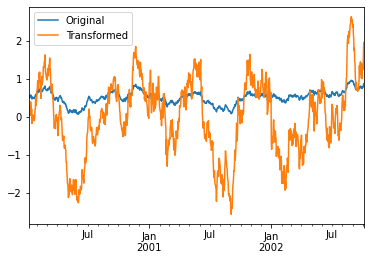

In [64]:
compare = pd.DataFrame({"Original": ts, "Transformed": transformed})
compare.plot()

In [65]:
ts.groupby(lambda x: x.year).transform(lambda x: x.max() - x.min())

2000-01-08    0.784145
2000-01-09    0.784145
2000-01-10    0.784145
2000-01-11    0.784145
2000-01-12    0.784145
                ...   
2002-09-30    0.591984
2002-10-01    0.591984
2002-10-02    0.591984
2002-10-03    0.591984
2002-10-04    0.591984
Freq: D, Length: 1001, dtype: float64

In [66]:
max = ts.groupby(lambda x: x.year).transform("max")
min = ts.groupby(lambda x: x.year).transform("min")
max - min

2000-01-08    0.784145
2000-01-09    0.784145
2000-01-10    0.784145
2000-01-11    0.784145
2000-01-12    0.784145
                ...   
2002-09-30    0.591984
2002-10-01    0.591984
2002-10-02    0.591984
2002-10-03    0.591984
2002-10-04    0.591984
Freq: D, Length: 1001, dtype: float64

## 5. Filtration 

In [67]:
sf = pd.Series([1, 1, 2, 3, 3, 3])

In [68]:
sf.groupby(sf).filter(lambda x: x.sum() > 2)

3    3
4    3
5    3
dtype: int64

In [69]:
dff = pd.DataFrame({"A": np.arange(8), "B": list("aabbbbcc")})

In [70]:
dff.groupby("B").filter(lambda x: len(x) > 2)

,A,B
2,2,b
3,3,b
4,4,b
5,5,b


In [71]:
dff.groupby("B").filter(lambda x: len(x) > 2, dropna=False)

,A,B
0,NaN,NaN
1,NaN,NaN
2,2.0,b
3,3.0,b
4,4.0,b
5,5.0,b
6,NaN,NaN
7,NaN,NaN


In [72]:
dff["C"] = np.arange(8)
dff.groupby("B").filter(lambda x: len(x["C"]) > 2)

,A,B,C
2,2,b,2
3,3,b,3
4,4,b,4
5,5,b,5


# Exercises: 

1. Find the maximum price of any item ordered in the items_ordered. //1250.00
2. Calculate the average price of all of the items ordered that were purchased in the month of Dec. //174.312500
3. What are the total number of rows in the items_ordered table? //32
4. For all of the tents that were ordered in the items_ordered table, what is the price of the lowest tent? //79.99
5. How many people are in each unique state in the customers.xlsx? Indicate the state and display the number of people in each. 

        Arizona	6
        Colorado	2
        Hawaii	1
        Idaho	1
        North Carolina	1
        Oregon	2
        Sourth Carolina	1
        Washington	2
        Wisconsin	1

6. From the items_ordered table, select the item, maximum price, and minimum price for each specific item in the table. Hint: The items will need to be broken up into separate groups.
            
            Bicycle	380.50	380.50
            Canoe	280.00	280.00
            Canoe paddle	40.00	40.00
            Compass	8.00	8.00
            Ear Muffs	12.50	12.50
            Flashlight	28.00	4.50
            Helmet	22.00	22.00
            Hoola Hoop	14.75	14.75
            Inflatable Mattress	38.00	38.00
            Lantern	29.00	16.00
            Lawnchair	32.00	32.00
            Life Vest	125.00	125.00
            Parachute	1250.00	1250.00
            Pillow	8.50	8.50
            Pocket Knife	22.38	22.38
            Pogo stick	28.00	28.00
            Raft	58.00	58.00
            Rain Coat	18.30	18.30
            Shovel	16.75	16.75
            Skateboard	33.00	33.00
            Ski Poles	25.50	25.50
            Sleeping Bag	89.22	88.70
            Snow Shoes	45.00	45.00
            Tent	88.00	79.99
            Umbrella	6.75	4.50
            Unicycle	192.50	180.79
            
7. How many orders did each customer make? Use the items_ordered. Find the customerid, number of orders they made, and the sum of their orders.


        10101	6	320.75
        10298	5	118.88
        10299	2	1288.00
        10315	1	8.00
        10330	3	72.75
        10339	1	4.50
        10410	2	281.72
        10413	1	32.00
        10438	3	95.24
        10439	2	113.50
        10449	6	930.79